# Student Score Prediction 


In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

## Importing Libraries

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Reading the Dataset

In [66]:
# Load data
data = pd.read_csv('http://bit.ly/w-data')

In [67]:
#first five rows of the dataset
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [68]:
data.describe()



,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [69]:
#No. of rows and columns in the dataset respectively
data.shape

(25, 2)

## Visualization of the Dataset

Text(27.0, 0.5, 'Scores')

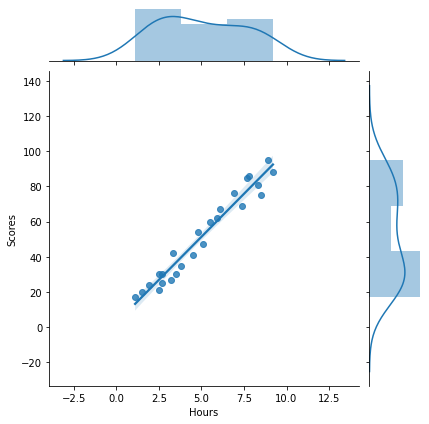

In [70]:
# Plot jointplot for hours and scores values
sns.jointplot(x = 'Hours',y = 'Scores',data = data,kind = 'reg')
plt.xlabel("Hours")
plt.ylabel("Scores")


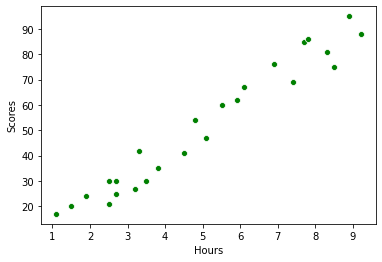

In [71]:
sns.scatterplot( x=data.Hours , y=data.Scores , color='green')

Map shows there is 98% corellation between Hours and Studies


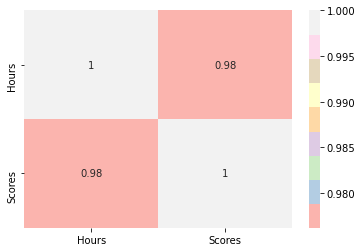

In [72]:
relation = data.corr()
sns.heatmap(relation, annot=True, cmap='Pastel1')
print('Map shows there is 98% corellation between Hours and Studies')

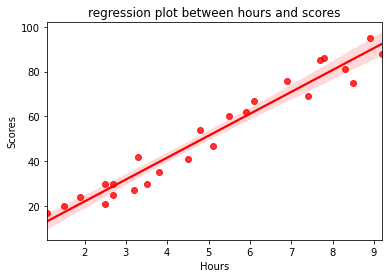

In [73]:
sns.regplot(x=data.Hours,y=data.Scores,color='r')

plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("regression plot between hours and scores")
plt.show()

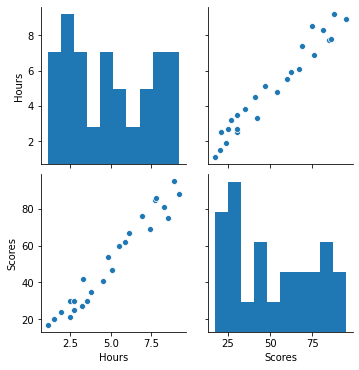

In [74]:
# pairplot fro the given data
sns.pairplot(data)

## Training the Model Using Train Test Split

In [75]:
# Train the model 
x = data.iloc[:,:1].values
y = data.iloc[:,1:2].values
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state =0)

## Linear Regression

In [76]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [77]:
model.coef_

array([[9.91065648]])

In [78]:
model.intercept_

array([2.01816004])

In [79]:
#predicting
y_pred = model.predict(X_test)


In [82]:
from sklearn import metrics  
print('Mean Absolute Error::', metrics.mean_absolute_error(y_test, y_pred))


Mean Absolute Error:: 4.183859899002975


### Actual and Predicted Values

In [98]:
df = pd.Series({'Actual': y_test,'Predicted': np.round_(y_pred, decimals = 0, out = None)})
print(df)

Actual                 [[20], [27], [69], [30], [62]]
Predicted    [[17.0], [34.0], [75.0], [27.0], [60.0]]
dtype: object


### Accuracy

In [103]:
print('The test score:', model.score(X_test,y_test))


The test score: 0.9454906892105356


#### What will be predicted score if a student study for 9.25 hrs in a day?

In [105]:
z = model.predict([[9.25]])
print(' If a student study for 9.25 hrs in a day so predicted Score is ' ,z)

 If a student study for 9.25 hrs in a day so predicted Score is  [[93.69173249]]
